In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Part 5: Naive Bayes Classification

In [3]:
#2 load Dataset
dataset="Naive-Bayes-Classification-Data.csv"
data=pd.read_csv(dataset)
data.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [4]:
#3 Dataset Information
print("DATASET DESCRIPTION")
print(data.describe()) 
print("--------------")
print("DATASET INFORMATION")
print(data.info())

DATASET DESCRIPTION
          glucose  bloodpressure    diabetes
count  995.000000     995.000000  995.000000
mean    44.306533      79.184925    0.500503
std      6.707567       9.340204    0.500251
min     20.000000      50.000000    0.000000
25%     40.000000      72.000000    0.000000
50%     45.000000      80.000000    1.000000
75%     50.000000      87.000000    1.000000
max     70.000000     100.000000    1.000000
--------------
DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB
None


In [5]:
#8 Split Dataset
features=data.drop(columns=["diabetes"])
target=data["diabetes"]

#Partition the data into 80(training)/20(testing)
features_train, features_test, target_train, target_test=train_test_split(features,target,test_size=0.2,random_state=42)
print(features_train.describe())
print(features_test.describe())

          glucose  bloodpressure
count  796.000000     796.000000
mean    44.296482      79.359296
std      6.621485       9.343699
min     20.000000      50.000000
25%     40.000000      72.000000
50%     45.000000      80.000000
75%     50.000000      87.000000
max     70.000000     100.000000
          glucose  bloodpressure
count  199.000000     199.000000
mean    44.346734      78.487437
std      7.058584       9.317009
min     20.000000      57.000000
25%     40.000000      71.000000
50%     45.000000      78.000000
75%     50.000000      87.000000
max     65.000000     100.000000


In [6]:
print(target_train.describe())
print(target_test.describe())

count    796.000000
mean       0.492462
std        0.500258
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diabetes, dtype: float64
count    199.000000
mean       0.532663
std        0.500190
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: diabetes, dtype: float64


In [7]:
#7 Training the Model

g_nb=GaussianNB()
g_nb.fit(features_train,target_train)

GaussianNB()

In [8]:
#10 Prediction
target_prediction=g_nb.predict(features_test)
print(target_prediction)

[1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1
 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0
 1 1 1 0 1 1 1 1 0 0 1 0 0 0]


Confusion Matrix: 
 [[86  7]
 [ 7 99]]
Accuracy:  0.9296482412060302


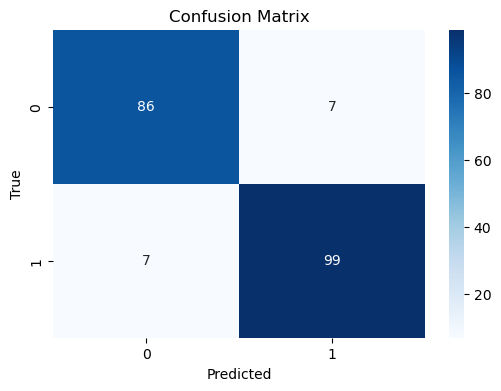

In [9]:
#9 Confusion Matrix
#Not Working with regression model
c_m=confusion_matrix(target_test,target_prediction)
accuracy=accuracy_score(target_test,target_prediction)
print ("Confusion Matrix: \n",c_m)
print ("Accuracy: ",accuracy)

# Confusion Matrix Graph
plt.figure(figsize=(6,4))
sns.heatmap(c_m,annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [10]:
#11 Model Evaluation
c_r=classification_report(target_test,target_prediction)
print ("Classification Report:\n ",c_r)

Classification Report:
                precision    recall  f1-score   support

           0       0.92      0.92      0.92        93
           1       0.93      0.93      0.93       106

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199



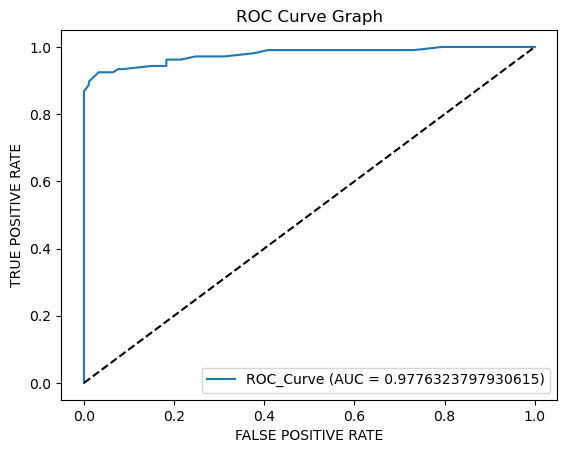

In [11]:
#12 ROC Curve Graphs
target_prediction_p= g_nb.predict_proba(features_test)[:,1]
fpr,tpr,thresholds=roc_curve(target_test,target_prediction_p)
roc_auc=auc(fpr,tpr)

#Plotting
plt.figure()
plt.plot(fpr,tpr,label="ROC_Curve (AUC = "+str(roc_auc)+")")
plt.plot([0,1],[0,1], linestyle="dashed",color="black")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC Curve Graph")
plt.legend()
plt.show()

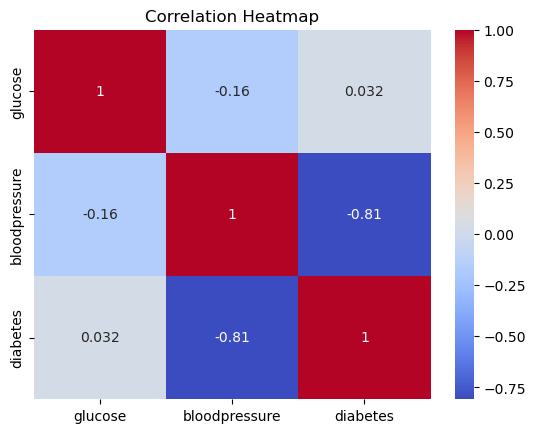

In [12]:
#Graph Correlation Heatmap
plt.figure()
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

920    0
525    0
567    0
657    0
633    0
      ..
486    0
451    0
65     0
141    0
685    0
Name: diabetes, Length: 199, dtype: int64


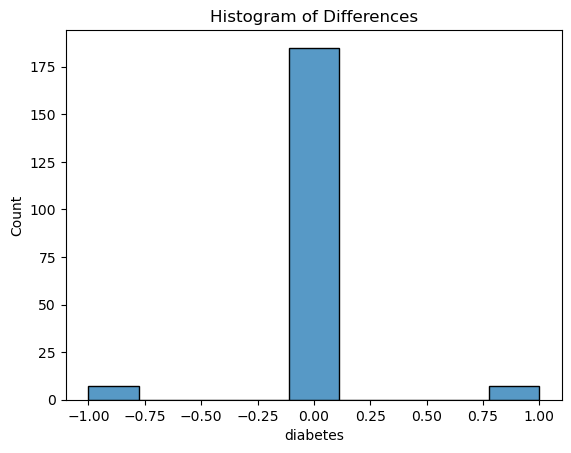

In [13]:
#Graph Histogram
diff=target_test-target_prediction
print(diff)

plt.figure()
sns.histplot(diff)
plt.title("Histogram of Differences")
plt.show()

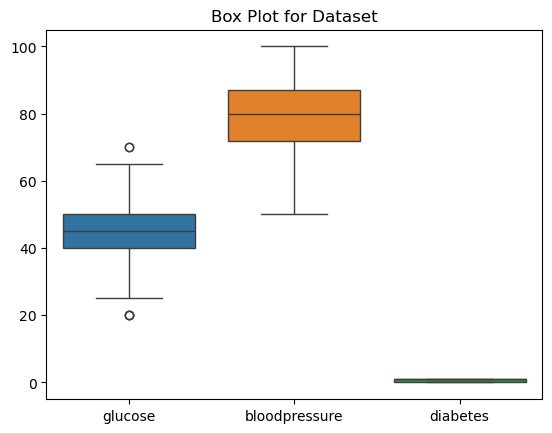

In [14]:
#Graph Box Plot for Dataset
plt.figure()
sns.boxplot(data)
plt.title("Box Plot for Dataset")
plt.show()

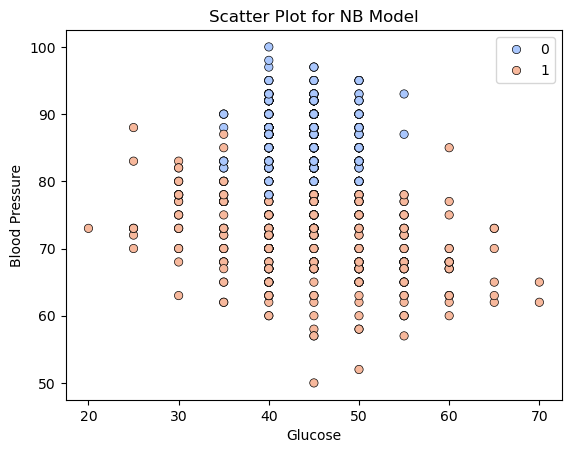

In [15]:
#Generating Scatter Plot
sns.scatterplot(x=features_train["glucose"],y=features_train["bloodpressure"],hue=target_train,edgecolor="k",palette="coolwarm")
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.title("Scatter Plot for NB Model")
plt.legend()
plt.show()